<a href="https://colab.research.google.com/github/StefanosGZ/Learnpytorch.io/blob/main/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

2.2.1+cu121


'cpu'

## 1. What are 3 areas in industry where computer vision is currently being used?

1. Image classification
2. Detecting (Videos)
3. Self-driving cars

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

Overfitting in machine learning occurs when a model learns the training data too well, capturing noise and details to the extent that it negatively impacts the performance on new, unseen data.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

1. Cross-validation: This technique involves dividing the dataset into multiple parts, using some for training and the rest for validation. It helps ensure that the model performs well on unseen data.
2. Regularization: Methods like Ridge and Lasso add a penalty for larger coefficients in the model, which can reduce overfitting by preventing the model from becoming too complex.
3. Early Stopping: This is a form of regularization where you stop training before the model has a chance to overfit. Monitoring the validation loss and stopping when it begins to increase can prevent overfitting.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

Done

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
from torchvision.transforms import ToTensor
from torchvision.datasets import MNIST

train_data = MNIST(root = 'data',
                   train = True,
                   download = True,
                   transform = ToTensor(),
                   target_transform = None)
test_data = MNIST(root = 'data',
                  train = False,
                  download = True,
                  transform = ToTensor(),
                  target_transform = None)

train_data, test_data

100%|██████████| 9912422/9912422 [00:00<00:00, 310340613.01it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 30543543.58it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 113991946.54it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 3166643.74it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 6. Visualize at least 5 different samples of the MNIST training dataset.

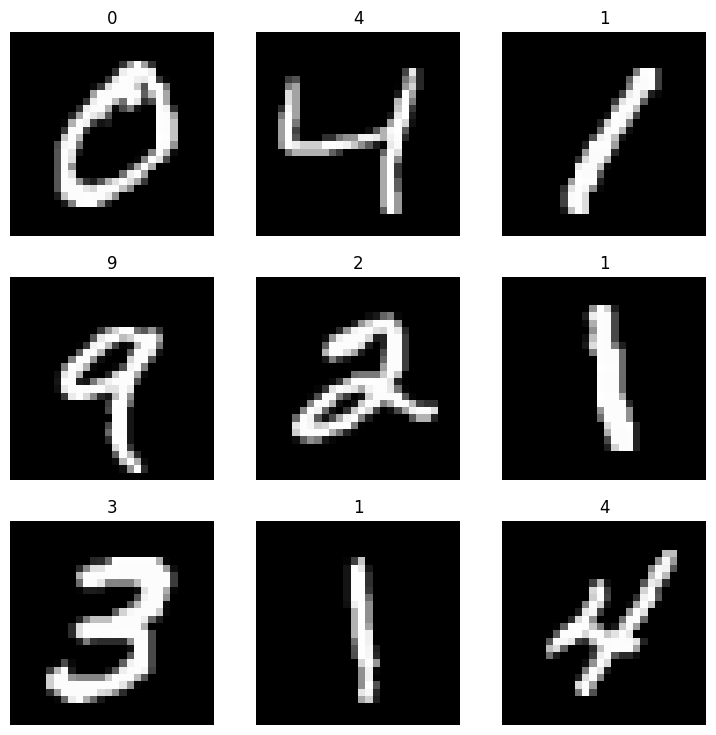

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(9,9))
rows, cols = 3,3

for i in range(1,rows*cols+1):
  img = train_data[i][0]
  img = img.squeeze()

  label = train_data[i][1]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img, cmap='gray')
  plt.title(label)
  plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [5]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(
    dataset = train_data,
    batch_size = 32,
    shuffle = True,
)

test_dataloader = DataLoader(
    dataset = test_data,
    batch_size = 32,
    shuffle = False
)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [6]:
from torch import nn
class MNISTV0(torch.nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
      nn.Conv2d(in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=hidden_units*7*7,
                out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(f"Output shape of conv block 1: {x.shape}")
    x = self.conv_block_2(x)
    # print(f"Output shape of conv block 2: {x.shape}")
    x = self.classifier(x)
    # print(f"Output shape of classifier: {x.shape}")
    return x


In [7]:
model = MNISTV0(input_shape = 1,
                hidden_units = 10,
                output_shape = 10).to(device)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [8]:
from timeit import default_timer as timer
from tqdm.auto import tqdm

In [9]:
def train_step(model: nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.Optimizer,
              device: torch.device = device):
  train_loss = 0
  model.to(device)
  model.train()
  for batch, (X,y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)

    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()
  train_loss /= len(data_loader)
  print(f"Train loss: {train_loss:.3f}")

In [10]:
def test_step(model: nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device = device):
  test_loss = 0
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)

      test_pred = model(X)

      loss = loss_fn(test_pred, y)
      test_loss += loss

    test_loss /= len(data_loader)
    print(f'Test loss: {test_loss:.3f}')

In [11]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model.parameters(),
                             lr = 0.01)

In [12]:
loss_fn_device = nn.CrossEntropyLoss()
optimizer_device = torch.optim.Adam(params = model.parameters(),
                                    lr = 0.01)

In [13]:
epochs = 5
cpu_start = timer()

for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}\n-----')
  train_step(model = model,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             device = 'cpu')
  test_step(model = model,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            device = 'cpu')

cpu_end = timer()

print(f"Total training time is: {cpu_end - cpu_start:.2f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-----
Train loss: 0.195
Test loss: 0.087
Epoch: 1
-----
Train loss: 0.112
Test loss: 0.085
Epoch: 2
-----
Train loss: 0.102
Test loss: 0.097
Epoch: 3
-----
Train loss: 0.098
Test loss: 0.072
Epoch: 4
-----
Train loss: 0.096
Test loss: 0.086
Total training time is: 400.13


In [14]:
epochs = 5
gpu_start = timer()

for epoch in tqdm(range(epochs)):
  print(f'Epochs: {epoch}\n-----')
  train_step(model = model,
             data_loader = train_dataloader,
             loss_fn = loss_fn_device,
             optimizer = optimizer_device,
             device = device)
  test_step(model = model,
            data_loader = test_dataloader,
            loss_fn = loss_fn_device,
            device = device)

gpu_end = timer()

print(f"Total training time is: {gpu_end - gpu_start:.2f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epochs: 0
-----
Train loss: 0.092
Test loss: 0.084
Epochs: 1
-----
Train loss: 0.096
Test loss: 0.111
Epochs: 2
-----
Train loss: 0.095
Test loss: 0.080
Epochs: 3
-----
Train loss: 0.098
Test loss: 0.084
Epochs: 4
-----
Train loss: 0.091
Test loss: 0.103
Total training time is: 327.15


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [15]:
import random
random.seed(42)

test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

In [16]:
pred_probs = []
model.eval()
model.to(device)
with torch.inference_mode():
  for sample in test_samples:
    sample = torch.unsqueeze(sample, dim=0).to(device)

    sample.to(device)

    pred_logit = model(sample)

    pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

    pred_probs.append(pred_prob.cpu())

  pred_probs = torch.stack(pred_probs)

  pred_classes = pred_probs.argmax(dim=1)

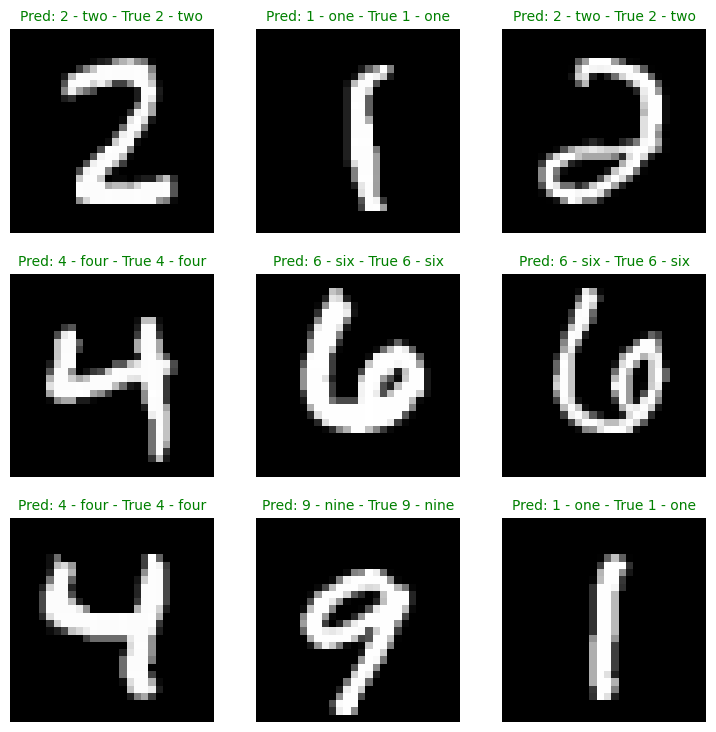

In [17]:
plt.figure(figsize=(9,9))
nrows, ncols = 3,3
class_names = train_data.classes
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)

  plt.imshow(sample.squeeze(), cmap='gray')

  pred_label = class_names[pred_classes[i]]
  true_label = class_names[test_labels[i]]

  title_text = f"Pred: {pred_label} - True {true_label}"

  if pred_label == true_label:
    plt.title(title_text, fontsize = 10, c='g')
  else:
    plt.title(title_text, fontsize = 10, c='r')

  plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [18]:
y_preds = []
model.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader, desc='Making predictions...'):

    X, y = X.to(device), y.to(device)

    y_logit = model(X)

    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)

    y_preds.append(y_pred.cpu())

  y_pred_tensor = torch.cat(y_preds)

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

In [19]:
pip install TorchMetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

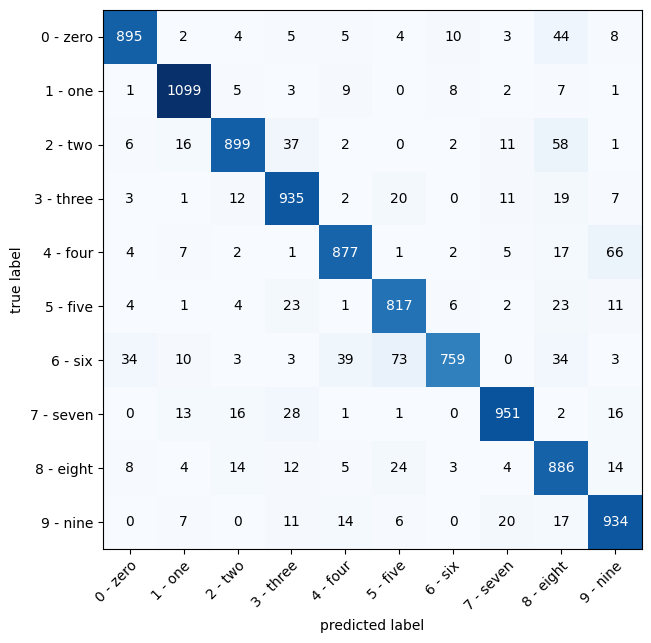

In [20]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes = len(class_names),
                          task = 'multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names = class_names,
    figsize=(10,7)
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [21]:
A = torch.rand(1, 3, 64, 64)

conv_layer = nn.Conv2d(in_channels = 3,
                      out_channels = 10,
                      kernel_size = 3,
                      stride = 2,
                      padding = 1)
B = conv_layer(A)

print(f'Original shape of random tensor: {A.shape} - Shape after convolutional layer: {B.shape}')

Original shape of random tensor: torch.Size([1, 3, 64, 64]) - Shape after convolutional layer: torch.Size([1, 10, 32, 32])


It compresses the image size

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [22]:
from torchvision.datasets import FashionMNIST

FashionMNIST_train = FashionMNIST(root = 'data',
                                 train = True,
                                 transform = ToTensor(),
                                 download = True,
                                 target_transform = None)
FashionMNIST_test = FashionMNIST(root = 'data',
                                 train = False,
                                 transform = ToTensor(),
                                 download = True,
                                 target_transform = None)

100%|██████████| 26421880/26421880 [00:01<00:00, 18479509.54it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 389571.40it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6132274.32it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 2676286.19it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [23]:
FashionMNIST_class_names = FashionMNIST_train.classes
FashionMNIST_class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [24]:
BATCH_SIZE = 32

FashionMNIST_train_dataloader = DataLoader(FashionMNIST_train,
                                           batch_size = BATCH_SIZE,
                                           shuffle = True)
FashionMNIST_test_dataloader = DataLoader(FashionMNIST_test,
                                          batch_size = BATCH_SIZE,
                                          shuffle = False)

In [26]:
model2 = MNISTV0(input_shape = 1,
                 hidden_units = 10,
                 output_shape = len(FashionMNIST_class_names)).to(device)

In [27]:
loss_fn_MNIST = nn.CrossEntropyLoss()
optimizer_MNIST = torch.optim.Adam(params = model2.parameters(),
                                   lr = 0.01)

In [29]:
epochs = 5
start_time_MNIST = timer()

for epoch in range(epochs):
  print(f"Epoch {epoch}\n-----")
  train_step(model = model2,
             data_loader = FashionMNIST_train_dataloader,
             loss_fn = loss_fn_MNIST,
             optimizer = optimizer_MNIST,
             device = device)
  test_step(model = model2,
            data_loader = FashionMNIST_test_dataloader,
            loss_fn = loss_fn_MNIST,
            device = device)
end_time_MNIST = timer()
print(f"Total time taken: {end_time_MNIST - start_time_MNIST}")

Epoch 0
-----
Train loss: 0.438
Test loss: 0.372
Epoch 1
-----
Train loss: 0.363
Test loss: 0.377
Epoch 2
-----
Train loss: 0.357
Test loss: 0.363
Epoch 3
-----
Train loss: 0.348
Test loss: 0.360
Epoch 4
-----
Train loss: 0.342
Test loss: 0.375
Total time taken: 279.240183376


In [30]:
MNIST_preds = []
model.eval()
with torch.inference_mode():
  for X,y in tqdm(FashionMNIST_test_dataloader, desc='Making predictions...'):

    X, y = X.to(device), y.to(device)

    y_logit = model(X)

    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)

    MNIST_preds.append(y_pred.cpu())

  MNIST_preds = torch.cat(y_preds)

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

In [34]:
import numpy as np
wrong_idx = np.where(MNIST_preds != FashionMNIST_test.targets)[0]

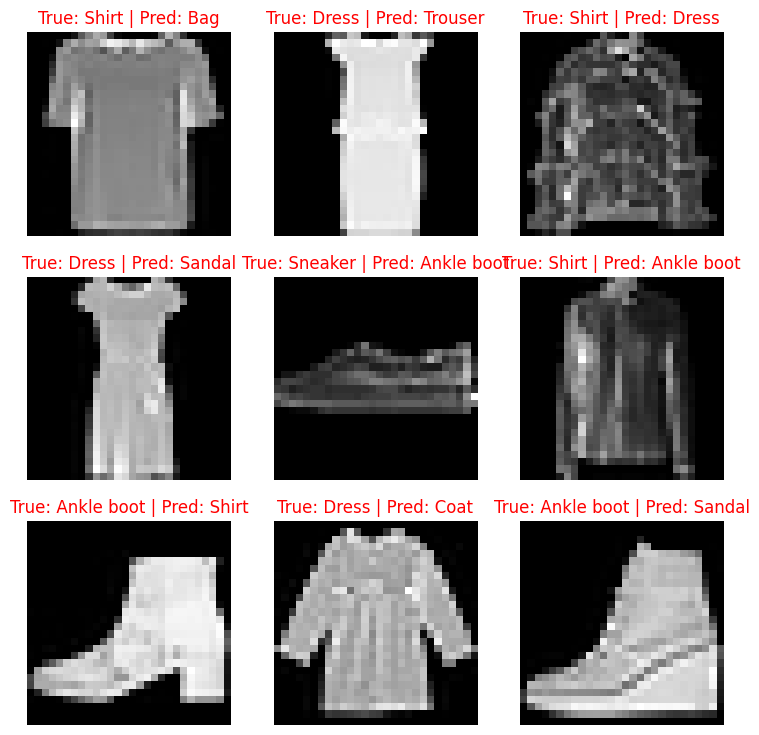

In [35]:
plt.figure(figsize=(9,9))
nrows, ncols = 3,3
random_wrong_selection = random.sample(list(wrong_idx), k = 9)
class_names = train_data.classes
for i, sample in enumerate(random_wrong_selection):
  true_label = FashionMNIST_class_names[FashionMNIST_test[sample][1]]
  pred_label = FashionMNIST_class_names[MNIST_preds[sample]]

  plt.subplot(3, 3, i+1)
  plt.imshow(FashionMNIST_test[sample][0].squeeze(), cmap="gray")
  plt.title(f"True: {true_label} | Pred: {pred_label}", c="r")
  plt.axis(False)


I think its a little bit of both a modelling and a data error. There are multiple different categories for shoes for example that I couldn't differentiate also the t-shirt vs shirt. But then on the other hand it somes predicts ankle boots as shirts...